In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:
#create dataframe
df=pd.read_csv("Zomato data .csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [10]:
df['rate']=df['rate'].astype(str).str.split('/').str.get(0)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Q)What type of restaurant do the major of customers order from?

Text(0.5, 0, 'type of restaurant')

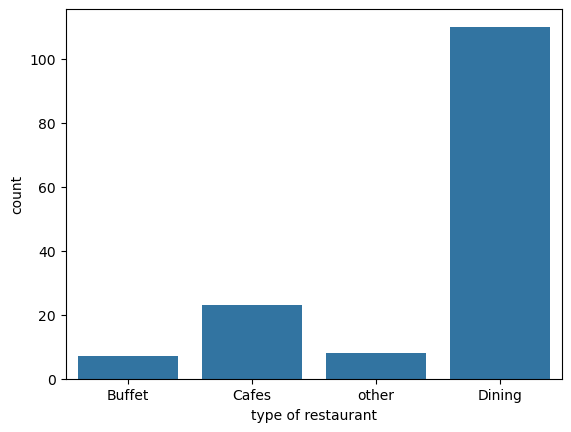

In [12]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of restaurant")

### conclusion -Dining type of restaurant do the majority of customers order from

## Q) How many votes has each type of restaurant recieved from customers?

Text(0, 0.5, 'Votes')

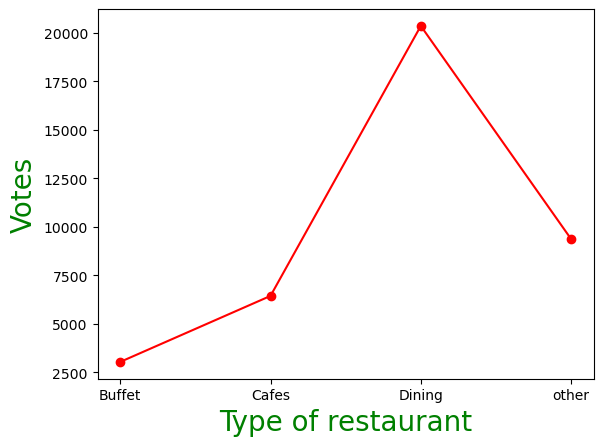

In [13]:
gd =df.groupby('listed_in(type)')['votes'].sum()
res=pd.DataFrame({'votes':gd})
plt.plot(res,c="red",marker="o")
plt.xlabel("Type of restaurant",c="green",size=20)
plt.ylabel("Votes",c="green",size=20)

### Conclusion- Type of restaurant which has highest number of votes is Dining restaurant.

## Q)What are the ratings that the majority of restaurants have recieved?

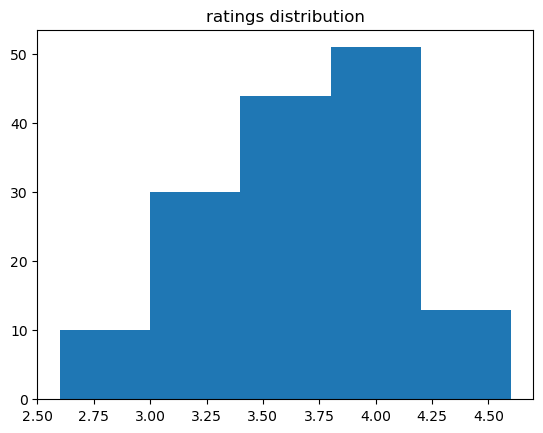

In [14]:
plt.hist(df['rate'],bins=5)
plt.title("ratings distribution")
plt.show()

### Conclusion - majority restaurants recieved between 3.75 to 4

## Q) Zomato has observed that most couples order most of their food online. What is their average spending on each food?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

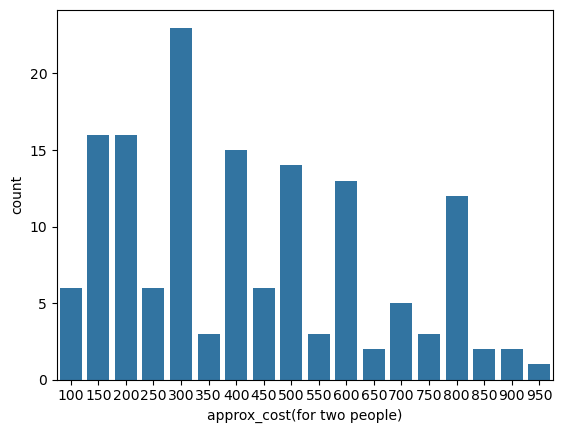

In [18]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

### Conclusion - majority of couples prefer restaurants with an approx cost of 300 rupees

## Q)Which mode(online or offline) has recieved maximum rating?

<Axes: xlabel='online_order', ylabel='count'>

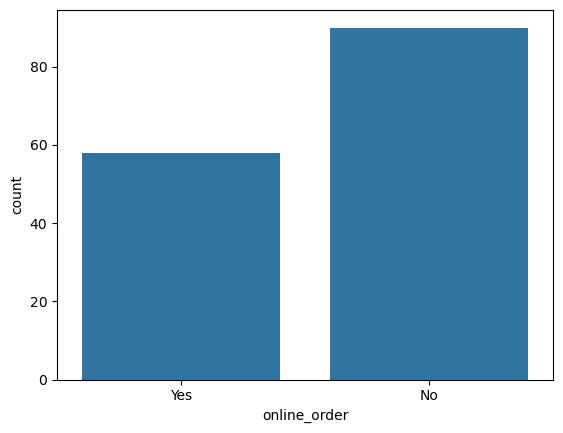

In [26]:
online_mode=df['online_order']
sns.countplot(x=online_mode)

<Axes: xlabel='online_order', ylabel='rate'>

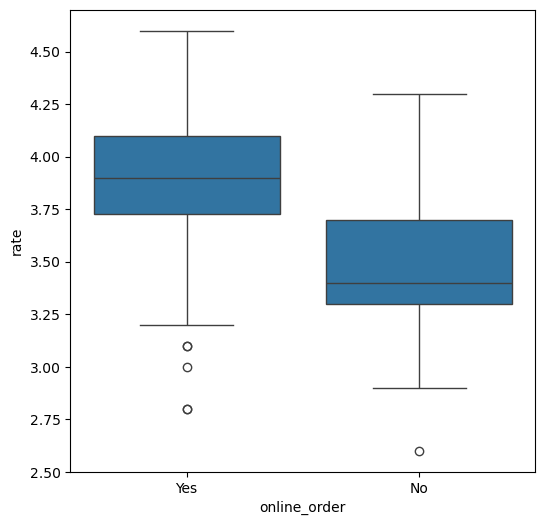

In [20]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate',data=df)

### Conclusion - Online orders got more rating which is around 3.75 to 4.125.

## Q) Which type of restaurant recieved more offline orders, so that Zomato can prove customers with some good offers? 

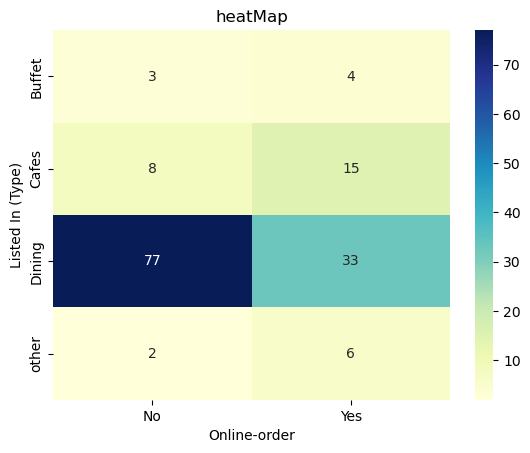

In [24]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("heatMap")
plt.xlabel("Online-order")
plt.ylabel("Listed In (Type)")
plt.show()

### Conclusion-Dinning restaurants primarly accept offline orders, whereas cafes primarily recieve online orders. This suggests that clients prefer to place orders in person at restaurants,but prefer online ordering at cafes.